# Audible Dataset  (Data Cleaning)
### by Antonio Rendon

## Table of Contents

1. [**Introduction**](#1)
    - Project Description
    - Data Description
2. [**Acquiring and Loading Data**](#2)
3. [**Conclusion**](#3)
      - Next Steps
4. [**References**](#4) 
      - Versioning

---

# 1

## Introduction

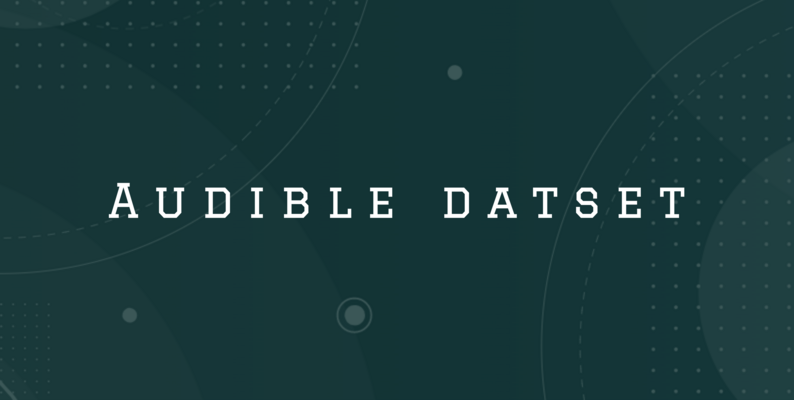


### Project Description


In this project, our primary focus will be on preparing and cleaning the data to ensure its quality and reliability. We will address missing values, handle outliers, and standardize formats to create a consistent and usable dataset for analysis. Data cleaning is a crucial step in the data analysis process, as it ensures that our findings and insights are accurate and meaningful. Let's roll up our sleeves and get ready to clean and refine the Audible data for an insightful and robust Exploratory Data Analysis (EDA). Let's begin!
<p>&nbsp;</p>


**Assumptions/Methodology/Scope:** 

Briefly describe assumptions, processing steps, and the scope of this project.

<p>&nbsp;</p>

### 💾  Data Description

We will be working with a dataset of audiobooks downloaded from Kagle. 
https://www.kaggle.com/datasets/snehangsude/audible-dataset?select=audible_uncleaned.csv

### The data dictionary

- "name" - The name of the audiobook.
- "author" - The audiobook's author.
- "narrator" - The audiobook's narrator.
- "time" -  The audiobook's duration, in hours and minutes.
- "releasedate" -  The date the audiobook was published.
- "language" -  The audiobook's language.
- "stars" -  The average number of stars (out of 5) and the number of ratings (if available).
- "price" -  The audiobook's price in INR (Indian Rupee).


# 2

## Acquiring and Loading Data
### Importing Libraries and Notebook Setup

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Data

In [5]:
# Load the audible_raw.csv file
audible = pd.read_csv('datasets/audible_uncleaned.csv')

# View the first rows of the dataframe
audible.head(5)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [3]:
# Lets use info to explore the data types in the dataset 
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


### Clean text data in Author and Narrator columns

We will start cleaning two columns, `author` and `narrator`. We can remove the `Writtenby:` and `Narratedby:` portions of the text in those columns.

For this, we will use the `.str.replace()` method 

The syntaxis is: string.replace(oldvalue, newvalue, count)

In [4]:
#Replace Writtenby:  in the author column
audible['author']= audible['author'].str.replace('Writtenby:', '')

#Replace Narratedby: in the narrator column 
audible['narrator']= audible['narrator'].str.replace('Narratedby:', '')

#Check the result 
audible.head(5)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


### Extract number of stars and ratings from Stars column.
The "stars" column combines both the number of stars and the number of ratings. To make the data more manageable, we will separate it into two columns: "stars" and "ratings".

To get an initial understanding of the entries in the "stars" column, we will use the .sample() method to randomly select and display a subset of entries from the column. This will give us a glimpse of the data and help us decide on the best approach to split the combined information into two distinct columns.

In [5]:
audible.stars.sample(n=20)

31801                  Not rated yet
36858       5 out of 5 stars1 rating
39310                  Not rated yet
81007                  Not rated yet
32936                  Not rated yet
74434                  Not rated yet
42636                  Not rated yet
48767                  Not rated yet
75565                  Not rated yet
28402    5 out of 5 stars135 ratings
5448                   Not rated yet
53613       5 out of 5 stars1 rating
62322      5 out of 5 stars5 ratings
4338                   Not rated yet
74897                  Not rated yet
646                    Not rated yet
23160                  Not rated yet
68094                  Not rated yet
34492                  Not rated yet
44864                  Not rated yet
Name: stars, dtype: object

It appears that the value 'Not rated yet' is repeated quite frequently in the dataset. Let's determine the exact count of how many times it occurs.

In [6]:
# First, let's count each value in the 'stars' column.
count_not_rated = (audible['stars'] == 'Not rated yet').sum()

# Now, let's find out how many times our value is repeated

print('The value \'Not rated yet\' is repeated:', str(count_not_rated), 'times in the "stars" column')

The value 'Not rated yet' is repeated: 72417 times in the "stars" column


So, let's convert the 'Not rated yet' values to a NaN value

In [7]:
# Replace 'Not rated yet' with NaN
audible.stars.replace('Not rated yet', np.nan, inplace=True)

It's time to clean the 'stars' column. As you can see, it currently combines information about the number of stars and the rating. We will now split it into two separate columns, each containing only the numerical values.

We can use `.str.extract()` to get the number of stars and the number of ratings into their own columns.

### Steps:
* Extract the number of stars into the `rating_stars` column
* Extract the number of ratings into the `n_ratings` column
* Convert both new columns to float

In [8]:
# Extract number of stars into rating_stars and turn into float
audible['rating_stars'] = audible['stars'].str.extract('^([\d.]+)').astype(float)

# Replace the comma, extract number of ratings into n_ratings and turn into float
audible['n_ratings'] = audible['stars'].str.replace(',', '').str.extract('(\d+) rating').astype(float)

# Examine the new rating_stars and n_ratings columns
audible[['rating_stars', 'n_ratings']]

,rating_stars,n_ratings
0,5.0,34.0
1,4.5,41.0
2,4.5,38.0
3,4.5,12.0
4,4.5,181.0
...,...,...
87484,NaN,NaN
87485,NaN,NaN
87486,NaN,NaN
87487,NaN,NaN


In order to finish with this step , we need to delete te old 'stars' column

In [9]:
# Dorp the stars column
audible.drop(columns=['stars'], axis=1, inplace=True)

# Check the results
audible

,name,author,narrator,time,releasedate,language,price,rating_stars,n_ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,468.00,5.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,820.00,4.5,41.0
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,410.00,4.5,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,615.00,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,820.00,4.5,181.0
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,596.00,NaN,NaN
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,820.00,NaN,NaN
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,English,938.00,NaN,NaN
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,680.00,NaN,NaN


Change data types

Another important step is to have our data in the correct data types

### Steps 
* Set `price` to float
* Turn `rating_stars` to category
* Convert `releasedate` to datetime

In [10]:
#Lets check the 'price' column
# Explore the price column
audible.price.sample(n=20)

29919      117.00
54009      434.00
5121       154.00
36887      334.00
62019      233.00
4389       164.00
4719        32.00
727        151.00
3765       586.00
51355    1,340.00
66116      585.00
70620      500.00
52834      938.00
44998      502.00
33567      367.00
8850       668.00
70108      820.00
76072      200.00
85760      586.00
82397      820.00
Name: price, dtype: object

The column contains the coma character, so lets get rid and convert to numeric.

In [11]:
# Replace the comma with ''
audible['price'] = audible.price.str.replace(',', '')

# Replace 'Free' with 0
audible['price'] = audible.price.str.replace('Free', '0')

# Turn price to float
audible['price'] = audible.price.astype(float)

* Turn `rating_stars` to category


In [12]:
# Turn rating_stars to category
audible['rating_stars'] = audible.rating_stars.astype('category')

* Convert `releasedate` date to datetime

We will use the `to_datetime()` function to turn the dates into datetime objects:

In [13]:
# Convert releasedate to datetime
audible['releasedate'] = pd.to_datetime(audible.releasedate)

# Inspect the dataframe 
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   time          87489 non-null  object        
 4   releasedate   87489 non-null  datetime64[ns]
 5   language      87489 non-null  object        
 6   price         87489 non-null  float64       
 7   rating_stars  15072 non-null  category      
 8   n_ratings     15072 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 5.4+ MB


## Extract hours and minutes from the `time` column

The 'time' column merges the hours and minutes into a single column. Our objective is to convert and merge this information into a new column called 'time_minutes'.

In [14]:
# Explore the values in the time column
audible.time.sample(n=10)

44021    11 hrs and 46 mins
79061     6 hrs and 46 mins
40665      11 hrs and 1 min
66689     4 hrs and 22 mins
38841     7 hrs and 33 mins
28299     6 hrs and 48 mins
71791     8 hrs and 25 mins
54781     17 hrs and 3 mins
55997      5 hrs and 2 mins
48906     2 hrs and 20 mins
Name: time, dtype: object

In [15]:
# Search the entries in the time column for different spellings of min. Let' try min, mins, minutes
audible.time[audible.time.str.contains('minute')].sample(n=10)

87106    Less than 1 minute
87099    Less than 1 minute
24070    Less than 1 minute
2697     Less than 1 minute
87159    Less than 1 minute
1404     Less than 1 minute
1403     Less than 1 minute
1408     Less than 1 minute
87100    Less than 1 minute
87119    Less than 1 minute
Name: time, dtype: object

Ok, we can see that we need to fix the following:

hr, hrs -> consolidate as hr
min, mins -> consolidate as min
Less than 1 minute -> round to 1 min

In [16]:
# Replace hrs, mins, and 'Less than 1 minute'
audible['time'] = audible.time.str.replace('hrs', 'hr')
audible['time'] = audible.time.str.replace('mins', 'min')
audible['time'] = audible.time.str.replace('Less than 1 minute', '1 min')
# Check the results
audible[['time']]

,time
0,2 hr and 20 min
1,13 hr and 8 min
2,2 hr and 3 min
3,11 hr and 16 min
4,10 hr
...,...
87484,7 hr and 34 min
87485,10 hr and 7 min
87486,19 hr and 4 min
87487,4 hr and 8 min


The subsequent task involves extracting the hours and minutes from the given text and then combining them into a new column called 'time_mins'.

Instructions:

* Extract the hours from the 'time' column and store it in the variable 'hours'.
* Extract the minutes from the 'time' column and store it in the variable 'mins'.
* Create the 'time_mins' column by combining the 'hours' and 'mins' variables.

In [17]:
# Extract the number of hours, turn to integer
hours = audible['time'].str.extract('(\d+) hr').fillna(0).astype(int)

# Extract the number of minutes, turn to integer
mins = audible['time'].str.extract('(\d+) min').fillna(0).astype(int)

# Combine hours and minutes into the time_mins column
audible['time_mins'] = hours * 60 + mins

# Check the results
audible[['time_mins']]

,time_mins
0,140
1,788
2,123
3,676
4,600
...,...
87484,454
87485,607
87486,1144
87487,248


Lets drop the 'time' column, because we dont need it anymore

In [18]:
# Drop the time column
audible.drop(columns=['time'], axis=1, inplace=True)

In [19]:
# Inspect the dataframe 
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   releasedate   87489 non-null  datetime64[ns]
 4   language      87489 non-null  object        
 5   price         87489 non-null  float64       
 6   rating_stars  15072 non-null  category      
 7   n_ratings     15072 non-null  float64       
 8   time_mins     87489 non-null  int32         
dtypes: category(1), datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 5.1+ MB


##  Check data ranges

An additional crucial task is to validate that the values in our columns fall within the anticipated ranges and do not contain any out-of-range values.

To achieve this, we will generate histograms of the numeric columns, allowing us to visually examine the ranges and distribution patterns.

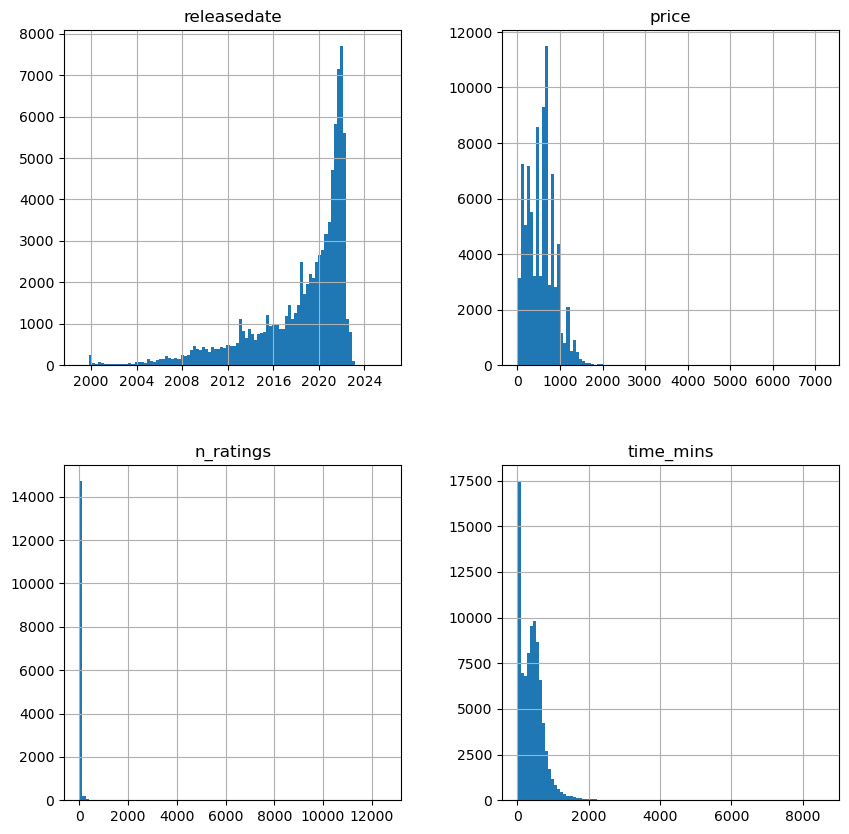

In [20]:
# Plot histograms of all the numerical columns
audible.hist(figsize=(10,10), bins=100)
plt.show()

Additionally, we can use .describe() to look at a summary of our data



In [21]:
# Look at the numeric columns
audible.describe()

,price,n_ratings,time_mins
count,87489.000000,15072.000000,87489.000000
mean,559.009246,21.613190,417.497663
std,336.096642,207.479634,364.559399
min,0.000000,1.000000,1.000000
25%,268.000000,1.000000,142.000000
50%,585.000000,2.000000,386.000000
75%,755.000000,7.000000,584.000000
max,7198.000000,12573.000000,8595.000000


Uhmmmm, it looks like the 'n_ratings' column has outliers. Further investigation could help determine if they are data entry errors, genuine extreme values, or have some other explanation. Understanding these outliers is essential for reliable data analysis.

Its time to  transform the prices in price to USD . We can use the exchange rate of 1 USD = 0.012 INR:

In [22]:
# Transform prices to USD (multiply times 0.012)
audible['price'] = audible.price  * 0.012

# Check the results
audible.price.describe()

count    87489.000000
mean         6.708111
std          4.033160
min          0.000000
25%          3.216000
50%          7.020000
75%          9.060000
max         86.376000
Name: price, dtype: float64

Lets review the 'language' column

In [23]:
# Inspect the language column before making changes
audible.language.unique()

array(['English', 'Hindi', 'spanish', 'german', 'french', 'catalan',
       'swedish', 'italian', 'danish', 'finnish', 'dutch', 'hebrew',
       'russian', 'polish', 'galician', 'afrikaans', 'icelandic',
       'romanian', 'japanese', 'tamil', 'portuguese', 'urdu', 'hungarian',
       'czech', 'bulgarian', 'mandarin_chinese', 'basque', 'korean',
       'arabic', 'greek', 'turkish', 'ukrainian', 'slovene', 'norwegian',
       'telugu', 'lithuanian'], dtype=object)

We need to standardize the capitalization in a consistent manner.

In [24]:
# Update capitalization in the language column
audible['language'] = audible.language.str.capitalize()

# Check the results
audible.language.unique()

array(['English', 'Hindi', 'Spanish', 'German', 'French', 'Catalan',
       'Swedish', 'Italian', 'Danish', 'Finnish', 'Dutch', 'Hebrew',
       'Russian', 'Polish', 'Galician', 'Afrikaans', 'Icelandic',
       'Romanian', 'Japanese', 'Tamil', 'Portuguese', 'Urdu', 'Hungarian',
       'Czech', 'Bulgarian', 'Mandarin_chinese', 'Basque', 'Korean',
       'Arabic', 'Greek', 'Turkish', 'Ukrainian', 'Slovene', 'Norwegian',
       'Telugu', 'Lithuanian'], dtype=object)

## How many duplicates do we have?

As a first step look for duplicates using `.duplicated()` and `.sum()`:

In [25]:
# Look for duplicate rows
audible.duplicated().sum()

0

Its ok, but it is useful to look for duplicates only using a subset of the columns that make sense. 
We will use the following subset of columns:

name
author
narrator
time_mins
price

Here we use .duplicated() again, but with our subset of columns.

In [26]:
# Create a list of our subset columns and assign to subset_cols
subset_cols = ['name', 'author', 'narrator', 'time_mins', 'price']

# Check for duplicates using our subset of columns
audible.duplicated(subset=subset_cols).sum()

70

Let's examine those values using keep=false to understand what is happening.

In [27]:
# Check the duplicated rows keeping the duplicates and order by the name column
audible[audible.duplicated(subset=subset_cols, keep=False)].sort_values(by='name')

,name,author,narrator,releasedate,language,price,rating_stars,n_ratings,time_mins
63978,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,2021-12-14,German,2.796,NaN,NaN,144
63965,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,2021-12-23,German,2.796,NaN,NaN,144
24625,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,2015-09-25,English,7.032,NaN,NaN,495
24116,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,2020-10-15,English,7.032,NaN,NaN,495
16971,Adagio in Dm,BillBrown,BillBrown,2021-06-08,English,5.472,NaN,NaN,78
...,...,...,...,...,...,...,...,...,...
18338,What I Talk About When I Talk About Running,HarukiMurakami,RayPorter,2016-07-07,English,4.776,4.5,193.0,263
38021,When Women Ruled the World,KaraCooney,KaraCooney,2018-11-30,English,10.032,4.5,14.0,555
20260,When Women Ruled the World,KaraCooney,KaraCooney,2018-11-30,English,10.032,4.5,13.0,555
22158,Wings of Fire,"APJAbdulKalam,ArunTiwari",GirishKarnad,2020-01-04,English,0.900,5.0,1823.0,75


Observing the data, we find that the duplicates correspond to files with different release dates. To address this, we can choose to retain the record with the latest release date.

To achieve this, we will use the drop_duplicates() method with the same subset and set keep=last to retain the last release date.

In [28]:
# Drop duplicated rows keeping the last release date
audible.drop_duplicates(subset=subset_cols, keep='last', inplace=True)
# Check again for duplicates using our subset of columns
audible.duplicated(subset=subset_cols).sum()

0

## Dealing with missing data

Before we finish, let's take a look at missing data in our columns. We can use the `.isna()` method and chain it with `.sum()` to get the total:

In [29]:
# Check for null values
audible.isna().sum()

name                0
author              0
narrator            0
releasedate         0
language            0
price               0
rating_stars    72387
n_ratings       72387
time_mins           0
dtype: int64

We have two choices for handling the missing values (NaN). We can either replace them with a number like 0 or keep them as they are. The decision depends on what we want to do with the data.

If we want to show the distribution of ratings, it's better to remove the audiobooks with no ratings. But if we need to analyze the pricing, keeping the unrated audiobooks is important as they might have a different pricing structure compared to rated ones.

For now, we will keep the audiobooks with no ratings in the dataset.

## Save the cleaned data set
We can use the .to_csv method to save the clean file. We include index=False so that we don't also copy the current index to our destination file.

In [30]:
# Save the dataframe to a new file: 'audible_clean.csv'
audible.to_csv('datasets/audible_clean.csv', index=False)

# 3

## Conclusion

We have worked with the Audible dataset and performed data cleaning. We addressed missing values and duplicates, and we also removed irrelevant information from certain fields. Additionally, we transformed some columns to extract more useful insights.

By cleaning the data, we have improved the dataset's quality and prepared it for further exploration and analysis. The process of data cleaning has helped us gain better insights, as we discarded unnecessary information and derived more valuable knowledge from the transformed columns. This ensures that the dataset is now in a more organized and reliable state, enabling us to make more informed decisions while working with the Audible dataset.

### Next steps

The next step will be conducting a more in-depth Exploratory Data Analysis (EDA). This will involve delving further into the dataset to uncover patterns, trends, and relationships between variables. We might use this analysis to create meaningful visualizations that can provide valuable insights into the data or developing machine learning algorithms.


# 4 

## References

This work is based on the Live Training by Rogelio Montemayor from DataCamp, titled "Data Cleaning in Python." 

### Versioning
Notebook and insights by (author).
- Version: 1.0
- Date: 23-07-2023